In [20]:
import torch

import requests

import torch.nn as nn

import torchvision.transforms as transforms

import matplotlib.pyplot as plt

from PIL import Image

from io import BytesIO

In [21]:
# Load image from web

url = 'https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png'
response = requests.get(url)

img = Image.open(BytesIO(response.content)).convert("L")  # Convert to grayscale

In [22]:
# Preprocess image (resize and convert to tensor)

transform = transforms.Compose([

    transforms.Resize((128, 128)),

    transforms.ToTensor()
])

img_tensor = transform(img).unsqueeze(0)  # Add batch dimension [1, 1, H, W]

In [23]:
# Create 3 convolution layers with different padding and stride settings

conv_layers = {

    "No Padding, Stride 1": nn.Conv2d(1, 1, kernel_size=5, stride=1, padding=0),

    "Padding=2, Stride 1": nn.Conv2d(1, 1, kernel_size=5, stride=1, padding=2),
    
    "Padding=2, Stride 2": nn.Conv2d(1, 1, kernel_size=5, stride=2, padding=2)
}

In [24]:
# Apply conv layers

outputs = {}

for name, layer in conv_layers.items():

    with torch.no_grad():
        
        outputs[name] = layer(img_tensor).squeeze().numpy()

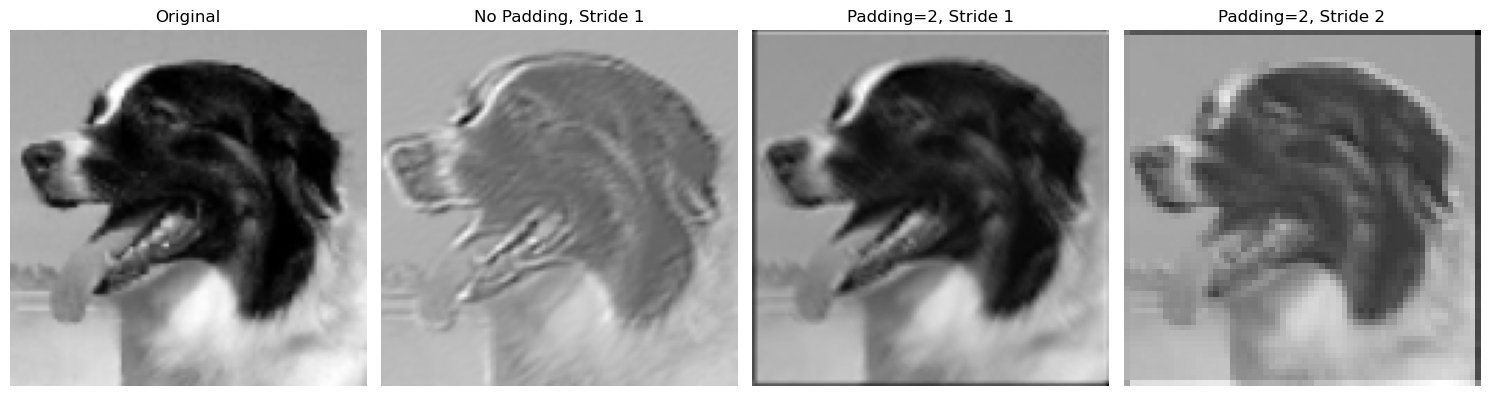

In [25]:
# Plot original and convolved outputs

plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)

plt.imshow(img_tensor.squeeze().numpy(), cmap='gray')

plt.title("Original")

plt.axis("off")

for i, (name, out_img) in enumerate(outputs.items(), 2):

    plt.subplot(1, 4, i)

    plt.imshow(out_img, cmap='gray')

    plt.title(name)

    plt.axis("off")

plt.tight_layout()

plt.show()
